In [1]:
import pandas as pd
import sqlite3

In [2]:
#Connecting to SQLITE database 
conn = sqlite3.connect('lahman2016.sqlite')

 Querying Database for all seasons where a team played 150 or more games and is still active today. 
 FranchiseID is common attribute between Teams table and TeamsFranchises table

In [4]:
query = '''select * from Teams
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G>= 150 and TeamsFranchises.active == 'Y';
'''

In [5]:
#Creating dataframe from query
teams = conn.execute(query).fetchall()

In [6]:
df = pd.DataFrame(teams)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [7]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin',
        'WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO',
        'SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF',
        'teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
df.columns=cols

In [8]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [9]:
df.shape

(2287, 52)

In [10]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID',
             'franchName','active','NAassoc']
df = df.drop(drop_cols,axis=1)

In [11]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


In [12]:
df.describe()

,yearID,G,W,R,AB,H,2B,3B,HR,BB,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,...,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2265.000000,2287.000000
mean,1967.512462,158.959773,79.230433,700.365982,5414.390031,1414.773502,244.439440,44.781373,117.527766,513.138610,...,10.463489,28.081767,4260.715348,1414.184521,117.460866,513.413205,817.533887,151.546130,145.466667,0.975552
std,33.207119,3.764287,13.045240,102.720336,172.157391,106.132452,45.846798,19.980028,56.047068,83.985826,...,4.802244,14.574419,117.254775,109.631025,51.877465,81.845625,258.356654,57.949909,23.682023,0.008877
min,1892.000000,150.000000,36.000000,371.000000,4768.000000,1044.000000,110.000000,6.000000,3.000000,282.000000,...,0.000000,0.000000,3807.000000,1018.000000,5.000000,233.000000,281.000000,54.000000,64.000000,0.913000
25%,1940.000000,155.000000,70.000000,634.000000,5297.500000,1348.000000,212.000000,30.000000,79.000000,457.000000,...,7.000000,15.000000,4155.000000,1343.000000,83.000000,462.000000,592.500000,113.000000,132.000000,0.972000
50%,1972.000000,162.000000,80.000000,698.000000,5457.000000,1413.000000,245.000000,40.000000,122.000000,510.000000,...,10.000000,30.000000,4301.000000,1415.000000,124.000000,512.000000,834.000000,137.000000,147.000000,0.978000
75%,1997.000000,162.000000,89.000000,765.000000,5538.000000,1486.500000,278.000000,55.500000,158.000000,568.000000,...,13.000000,40.000000,4353.000000,1484.000000,156.000000,567.000000,1012.500000,171.500000,161.000000,0.982000
max,2016.000000,165.000000,116.000000,1067.000000,5781.000000,1783.000000,376.000000,129.000000,264.000000,835.000000,...,32.000000,68.000000,4518.000000,1993.000000,258.000000,827.000000,1510.000000,565.000000,217.000000,0.991000


In [13]:
df['teamID'].value_counts()

PIT    111
SLN    111
CIN    111
CHN    110
PHI    109
DET    108
CLE    107
NYA    107
BOS    107
CHA    106
BAL     60
LAN     56
SFN     56
NY1     55
WS1     55
BRO     54
MIN     53
NYN     52
HOU     52
BSN     50
SLA     48
ATL     48
PHA     47
OAK     46
KCA     45
SDN     45
TEX     42
TOR     37
SEA     37
MON     33
CAL     29
ML4     25
COL     22
TBA     19
ARI     19
MIL     19
FLO     17
LAA     16
ML1     13
KC1     13
WAS     12
WS2     11
ANA      8
MIA      5
SE1      1
Name: teamID, dtype: int64

# Data Cleaning

In [14]:
#Null values in each column
df.apply(lambda x: sum(x.isnull()),axis=0)

yearID       0
teamID       0
G            0
W            0
R            0
AB           0
H            0
2B           0
3B           0
HR           0
BB           0
SO         110
SB           0
CS         419
HBP       1777
RA           0
ER           0
ERA          0
CG           0
SHO          0
SV           0
IPouts       0
HA           0
HRA          0
BBA          0
SOA          0
E            0
DP          22
FP           0
dtype: int64

In [15]:
#CS and HBP aren't important columns, also we cannot handle such large NA values. So dropping those columns
df = df.drop(['CS','HBP'],axis=1)

In [16]:
#Imputing missing values in SO and DP with median values
df['SO']=df['SO'].fillna(df['SO'].median())
df['DP']=df['DP'].fillna(df['DP'].median())

In [17]:
df.apply(lambda x: sum(x.isnull()),axis=0)

yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

# Data Exploration

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Distribution of wins')

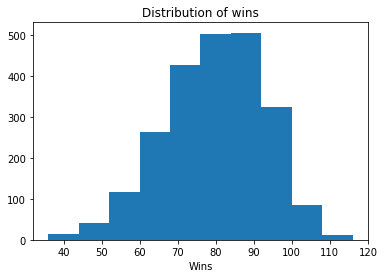

In [19]:
#Distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of wins')

In [20]:
df['W'].mean()

79.23043288150416

In [21]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
        
# Apply `assign_win_bins` to `df['W']`    
df['win_bins'] = df['W'].apply(assign_win_bins)

Text(0,0.5,'Wins')

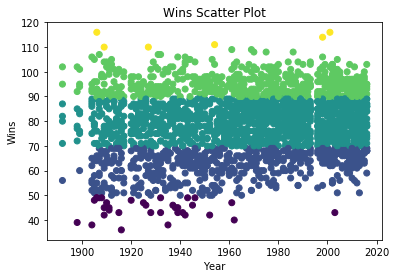

In [22]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

In [23]:
#there are very few seasons from before 1900 and they may mislead the model
#Hence remove such rows
df = df[df['yearID']>1900]

When dealing with continuous data and creating linear models, integer values such as a year can cause issues. 
It is unlikely that the number 1950 will have the same relationship to the rest of the data that the 
model will infer.

Hence we can create new variables which will infer the year

In [25]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

In [26]:
#convert the years into decades by creating dummy columns for each decade
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

In [27]:
# Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

In [29]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,decade_2010,year_label,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,0,4,0,0,0,1,0,0,0,0
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,0,4,0,0,0,1,0,0,0,0
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,0,5,0,0,0,0,1,0,0,0
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,0,5,0,0,0,0,1,0,0,0
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,0,5,0,0,0,0,1,0,0,0


In [28]:
df.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA',
       'BBA', 'SOA', 'E', 'DP', 'FP', 'win_bins', 'decade_label',
       'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940',
       'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980',
       'decade_1990', 'decade_2000', 'decade_2010', 'year_label', 'era_1',
       'era_2', 'era_3', 'era_4', 'era_5', 'era_6', 'era_7', 'era_8'],
      dtype='object')

In [30]:
# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

In [31]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

In [32]:
#Let us see how each variable is correlated with target variable
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0.033679
decade_1980    0.043516
decade_1990    0.044150
decade_2000    0.052283
decade_2010    0.043453
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0

# Machine learning model

In [33]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts',
                'HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7',
                'era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
                'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','W']
data = df[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5',
'era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game']


x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

     G    R    AB     H   2B  3B   HR   BB      SO   SB ...  decade_1950  \
0  162  744  5424  1331  218  22  189  681  1068.0   37 ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46 ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43 ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49 ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107 ...            0   

   decade_1960  decade_1970  decade_1980  decade_1990  decade_2000  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   decade_2010  R_per_game  RA_per_game   W  
0            0    4.592593     4.839506  70  
1            0    4.432099    

In [34]:
test.shape

(566, 46)

# Linear Regression

In [35]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

2.68646245444


In [36]:
#Calculating Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predictions))
rms

3.4022302877337154

In [47]:
from sklearn.linear_model import RidgeCV

rrm = RidgeCV(alphas=(0.01,0.1,1.0,10), normalize=True)
rrm.fit(x_train,y_train)
predictions_rrm = rrm.predict(x_test)

In [49]:
mae = mean_absolute_error(y_test, predictions_rrm)
mae

2.673970887870917

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

In [43]:
sqrt(mean_squared_error(y_test,pred))

4.590988253619947

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb = XGBRegressor(max_depth=15)
xgb.fit(x_train,y_train)
pred2 = xgb.predict(x_test)

In [46]:
sqrt(mean_squared_error(y_test,pred2))

4.15643818510221